# SGD

In [78]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
    
def getdata(n):
    x = np.arange(-5, 5.1, 10/(n-1))
    # making a random noise
    y = 3*x + 2 + (np.random.rand(len(x))-0.5)*20
    return x, y

def plot_error(x, y):
    a = np.arange(-10, 16, 1)
    b = np.arange(-10, 16, 1)
    mesh = np.meshgrid(a, b)

    sqr_err = 0
    for xs, ys in zip(x, y):
        sqr_err += ((mesh[0]*xs + mesh[1]) - ys) ** 2
    loss = sqr_err/len(x)
    
    plt.contour(mesh[0], mesh[1], loss, 20, cmap=plt.cm.jet)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.axis('scaled')
    plt.title('function loss')

# BGD 
class my_BGD:    
    def __init__(self, a, b, x, y, alpha):
        self.a = a
        self.b = b
        self.x = x
        self.y = y
        self.alpha = alpha
        
        self.a_old = a
        self.b_old = b
        
        self.loss = None;
    
    # Loss function
    def mse(self):
        sqr_err = ((self.a*self.x + self.b) - self.y) ** 2
        return np.mean(sqr_err)
    
    def gradient(self):
        grad_a = 2 * np.mean((self.a*self.x + self.b - self.y) * (self.x))
        grad_b = 2 * np.mean((self.a*self.x + self.b - self.y) * (1))
        return grad_a, grad_b

    def update(self):
        # calculate gradient
        grad_a, grad_b = self.gradient()
        
        # update gradient
        self.a_old = self.a
        self.b_old = self.b
        self.a = self.a - self.alpha * grad_a
        self.b = self.b - self.alpha * grad_b
        self.loss = self.mse();

In [79]:
# SGD
class my_SGD(my_BGD):    
    def __init__(self, a, b, x, y, alpha):
        super().__init__(a, b, x, y, alpha)
    
    def gradient(self):
        idx = np.random.randint(len(x))
        
        grad_a = 2 * (self.a*self.x[idx] + self.b - self.y[idx]) * (self.x[idx])
        grad_b = 2 * (self.a*self.x[idx] + self.b - self.y[idx]) * (1)
        return grad_a, grad_b

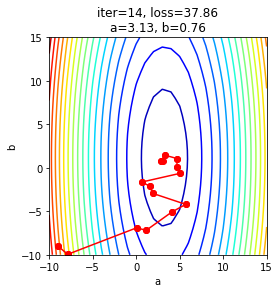

In [80]:
# random a data set
x, y = getdata(51)

# plot error
plot_error(x, y)

# initial guess
alpha = 0.05


a = -9; b = -9


mlclass = my_SGD(a, b, x, y, alpha) 

plt.plot(a, b, 'ro-')
plt.title('Initial, loss='+'{:.2f}'.format(mlclass.mse())+'\na='+
          '{:.2f}'.format(a)+', b='+'{:.2f}'.format(b))

iter = []
loss = []

for i in range(1, 15):
    mlclass.update()
    iter.append(i)
    loss.append(mlclass.loss)
    
    plt.plot((mlclass.a_old, mlclass.a), (mlclass.b_old, mlclass.b), 'ro-')
    plt.title('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss)+'\na='+
              '{:.2f}'.format(mlclass.a)+', b='+'{:.2f}'.format(mlclass.b))


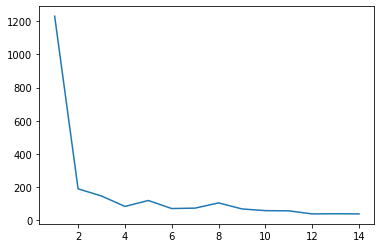

In [81]:
plt.plot(iter, loss)

# Mini-Batch

In [109]:
class my_MBGD(my_BGD):
    def __init__(self, a, b, x, y, alpha, batch_size):
        super().__init__(a, b, x, y, alpha)
        
        self.idx = 0
        self.batch_size = batch_size
        
        self.suffle_idx = np.random.permutation(len(x))       
        self.update_batch();

    def update_batch(self):
        idx = self.suffle_idx[self.idx:self.idx+self.batch_size];
        self.idx += self.batch_size

        self.x_batch = self.x[idx]
        self.y_batch = self.y[idx]
        
    # Loss function
    def mse(self):       
        sqr_err = ((self.a*self.x_batch + self.b) - self.y_batch) ** 2
        return np.mean(sqr_err)
    
    def gradient(self):        
        grad_a = 2 * np.mean((self.a*self.x_batch + self.b - self.y_batch) * (self.x_batch))
        grad_b = 2 * np.mean((self.a*self.x_batch + self.b - self.y_batch) * (1)) 
        self.update_batch();
        return grad_a, grad_b

In [110]:
alpha = 0.05
batch_size = 5

mlclass = my_MBGD(a, b, x, y, alpha, batch_size)

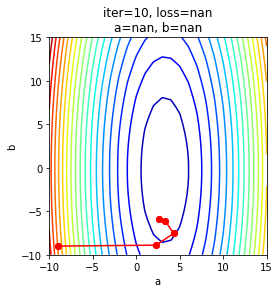

In [111]:

x, y = getdata(20)


plot_error(x, y)

plt.plot(a, b, 'ro-')
plt.title('Initial, loss='+'{:.2f}'.format(mlclass.mse())+'\na='+
          '{:.2f}'.format(a)+', b='+'{:.2f}'.format(b))

iter = []
loss = []

for i in range(1, 11):
    mlclass.update()
    iter.append(i)
    loss.append(mlclass.loss)
    
    plt.plot((mlclass.a_old, mlclass.a), (mlclass.b_old, mlclass.b), 'ro-')
    plt.title('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss)+'\na='+
              '{:.2f}'.format(mlclass.a)+', b='+'{:.2f}'.format(mlclass.b))

# Momentum

In [117]:
class my_SGDM(my_MBGD):
    def __init__(self, a, b, x, y, alpha, batch_size, gamma):
        super().__init__(a, b, x, y, alpha, batch_size)
        
        # Momentum parameter
        self.gamma = gamma
        
        self.sum_Ma = 0
        self.sum_Mb = 0
          
    def update(self):
        self.a_old = self.a 
        self.b_old = self.b
        
        grad_a, grad_b = self.gradient()

        self.sum_Ma = self.gamma * self.sum_Ma + self.alpha * grad_a
        self.sum_Mb = self.gamma * self.sum_Mb + self.alpha * grad_b
        
        self.a -= self.sum_Ma
        self.b -= self.sum_Mb 

        self.loss = self.mse();

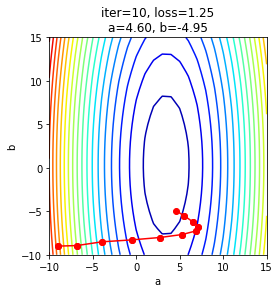

In [118]:
alpha = 0.01
batch_size = 5
gamma = 0.8

mlclass = my_SGDM(a, b, x, y, alpha, batch_size, gamma)

x, y = getdata(20)


plot_error(x, y)

plt.plot(a, b, 'ro-')
plt.title('Initial, loss='+'{:.2f}'.format(mlclass.mse())+'\na='+
          '{:.2f}'.format(a)+', b='+'{:.2f}'.format(b))

iter = []
loss = []

for i in range(1, 11):
    mlclass.update()
    iter.append(i)
    loss.append(mlclass.loss)
    
    plt.plot((mlclass.a_old, mlclass.a), (mlclass.b_old, mlclass.b), 'ro-')
    plt.title('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss)+'\na='+
              '{:.2f}'.format(mlclass.a)+', b='+'{:.2f}'.format(mlclass.b))

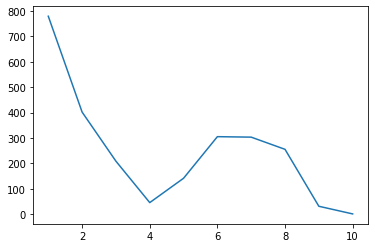

In [119]:
plt.plot(iter, loss)

# AdaGrad

In [120]:
class my_AdaGrad(my_MBGD):
    def __init__(self, a, b, x, y, alpha, batch_size):
        super().__init__(a, b, x, y, alpha, batch_size)
        
        self.sum_grad_a = 0
        self.sum_grad_b = 0
        
        # epsilon
        self.e = 1e-8
        
    def update(self):
        self.a_old = self.a 
        self.b_old = self.b
        
        grad_a, grad_b = self.gradient()
        
        self.sum_grad_a += grad_a ** 2
        self.sum_grad_b += grad_b ** 2
        
        self.a = self.a_old - (self.alpha/np.sqrt(self.sum_grad_a+self.e)) * grad_a
        self.b = self.b_old - (self.alpha/np.sqrt(self.sum_grad_b+self.e)) * grad_b

        self.loss = self.mse();

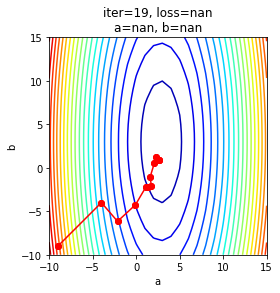

In [123]:
x, y = getdata(51)

plot_error(x, y)

alpha = 5

a = -9; b = -9

batch_size = 5

mlclass = my_AdaGrad(a, b, x, y, alpha, batch_size)

plt.plot(a, b, 'ro-')
plt.title('Initial, loss='+'{:.2f}'.format(mlclass.mse())+'\na='+
          '{:.2f}'.format(a)+', b='+'{:.2f}'.format(b))

iter = []
loss = []

for i in range(1, 20):
    mlclass.update()
    iter.append(i)
    loss.append(mlclass.loss)
    
    plt.plot((mlclass.a_old, mlclass.a), (mlclass.b_old, mlclass.b), 'ro-')
    plt.title('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss)+'\na='+
              '{:.2f}'.format(mlclass.a)+', b='+'{:.2f}'.format(mlclass.b))

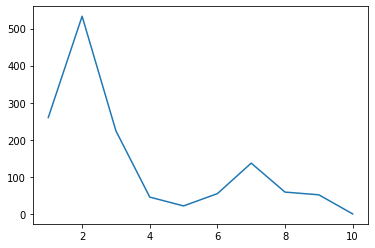

In [124]:
plt.plot(iter, loss)

# Adam

In [125]:
class my_Adam(my_MBGD):
    def __init__(self, a, b, x, y, alpha, batch_size, beta1, beta2):
        super().__init__(a, b, x, y, alpha, batch_size)
        
        self.beta1 = beta1
        self.beta2 = beta2
        self.e = 1e-6
        
        self.sum_Ma = 0
        self.sum_Mb = 0
        
        self.sum_grad_a = 0
        self.sum_grad_b = 0
        
    def update(self):
        self.a_old = self.a 
        self.b_old = self.b
        
        grad_a, grad_b = self.gradient()
        
        self.sum_Ma = self.beta1 * self.sum_Ma + (1-self.beta1) * grad_a
        self.sum_Mb = self.beta1 * self.sum_Mb + (1-self.beta1) * grad_b
        
        self.sum_grad_a = self.beta2 * self.sum_grad_a + (1-self.beta2) * grad_a ** 2
        self.sum_grad_b = self.beta2 * self.sum_grad_b + (1-self.beta2) * grad_b ** 2
        
        self.a -= (self.alpha*self.sum_Ma)/(np.sqrt(self.sum_grad_a)+self.e)
        self.b -= (self.alpha*self.sum_Mb)/(np.sqrt(self.sum_grad_b)+self.e)
        
        self.loss = self.mse();

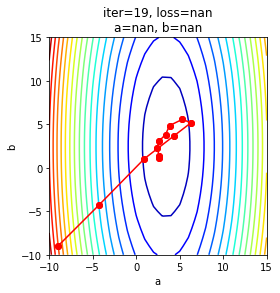

In [129]:
x, y = getdata(51)

plot_error(x, y)

alpha = 3
a = -9; b = -9
batch_size = 5

beta1 = 0.5
beta2 = 0.9

mlclass = my_Adam(a, b, x, y, alpha, batch_size, beta1, beta2)

plt.plot(a, b, 'ro-')
plt.title('Initial')
plt.title('Initial, loss='+'{:.2f}'.format(mlclass.mse())+'\na='+
          '{:.2f}'.format(a)+', b='+'{:.2f}'.format(b))

iter = []
loss = []

for i in range(1, 20):
    mlclass.update()
    iter.append(i)
    loss.append(mlclass.loss)
    
    plt.plot((mlclass.a_old, mlclass.a), (mlclass.b_old, mlclass.b), 'ro-')

    plt.title('iter='+str(i))
    plt.title('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss)+'\na='+
              '{:.2f}'.format(mlclass.a)+', b='+'{:.2f}'.format(mlclass.b))

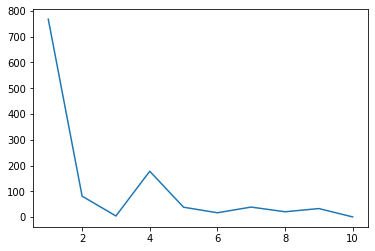

In [130]:
plt.plot(iter, loss)